In [1]:
%load_ext autoreload
%autoreload 

In [2]:
# GPU Config
from camdriving import check_GPU_config

gpu_device = check_GPU_config()
print(f"GPU config: {gpu_device}")

2024-12-18 10:36:54.179215: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-18 10:36:54.187272: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-18 10:36:54.197148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-18 10:36:54.200036: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-18 10:36:54.207416: I tensorflow/core/platform/cpu_feature_guar

Configured TensorFlow to use GPU: /physical_device:GPU:0
Memory growth enabled for the first GPU.
Physical GPUs: 1, Logical GPUs: 1
TensorFlow version: 2.17.0
CUDA device detected: True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU availability: True
GPU config: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


/home/federico/Projects/imgClassification/venv/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.22). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
I0000 00:00:1734529015.910004   10599 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1734529015.933451   10599 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1734529015.935042   10599 cuda_e

## 1. Data prep

In [3]:
download_data = False

if download_data:
    print('Downloading data')
    !wget -q https://github.com/alexgkendall/SegNet-Tutorial/archive/refs/heads/master.zip -O SegNet-Tutorial.zip
    !unzip -q SegNet-Tutorial.zip "SegNet-Tutorial-master/CamVid/*" -d ./data/
    !mv ./data/SegNet-Tutorial-master/CamVid ./data/CamVid
    !rm -rf SegNet-Tutorial.zip ./data/SegNet-Tutorial-master
else:
    print("Data already downloaded")


Data already downloaded


In [4]:
import os
DATA_DIR = './data/CamVid/'

x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'trainannot')

x_valid_dir = os.path.join(DATA_DIR, 'val')
y_valid_dir = os.path.join(DATA_DIR, 'valannot')

x_test_dir = os.path.join(DATA_DIR, 'test')
y_test_dir = os.path.join(DATA_DIR, 'testannot')

In [5]:
subdirs = ['train', 'test', 'val']

# Contar archivos PNG en cada subdirectorio
png_counts = {}
for subdir in subdirs:
    dir_path = os.path.join(DATA_DIR, subdir)
    if os.path.exists(dir_path):
        png_files = [f for f in os.listdir(dir_path) if f.endswith('.png')]
        png_counts[subdir] = len(png_files)
    else:
        print(f"Directory {dir_path} does not exist.")
        png_counts[subdir] = 0

# Mostrar resultados
for subdir, count in png_counts.items():
    print(f"Number of PNG files in '{subdir}': {count}")

Number of PNG files in 'train': 367
Number of PNG files in 'test': 233
Number of PNG files in 'val': 101


**NOTE**: We use augmentation given the small number of images

### 1.2.1. Images without augmentation

In [6]:
from camdriving import (Dataset, Dataloader, visualize)

Casting image 'imagen' to uint8.
Scaling normalized image 'máscara_coches' back to 0-255.
Scaling normalized image 'máscara_peatones' back to 0-255.
Scaling normalized image 'máscara_fondo' back to 0-255.


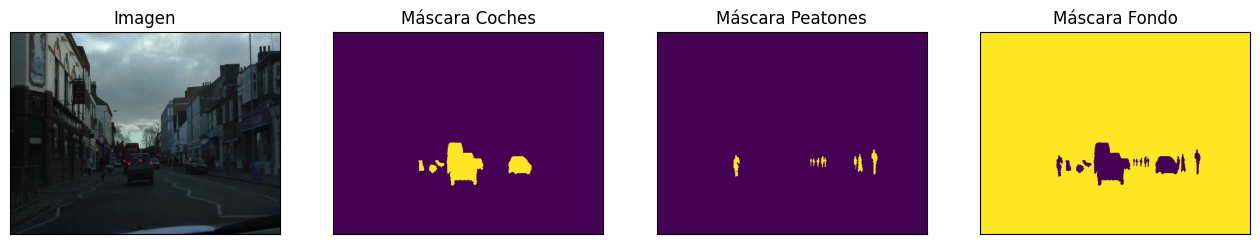

In [7]:
dataset = Dataset(x_train_dir, y_train_dir, classes=['coche', 'peatón'])
image, mask = dataset[8] # obtener una muestra
visualize(
imagen=image,
máscara_coches=mask[..., 0].squeeze(),
máscara_peatones=mask[..., 1].squeeze(),
máscara_fondo=mask[..., 2].squeeze(),
)

### 1.2.2. Images with augmentation

The images might appear with:

* Changes in orientation (e.g., flipped horizontally).
* Cropped or enlarged parts.
* Visible noise in specific regions.
* Variations in color or lighting.

In [8]:
from camdriving import (
    get_simple_training_augmentation,
    get_intense_training_augmentation,
    get_validation_augmentation, 
    get_preprocessing,
    )

Casting image 'imagen' to uint8.
Scaling normalized image 'máscara_coches' back to 0-255.
Scaling normalized image 'máscara_cielo' back to 0-255.
Scaling normalized image 'máscara_fondo' back to 0-255.


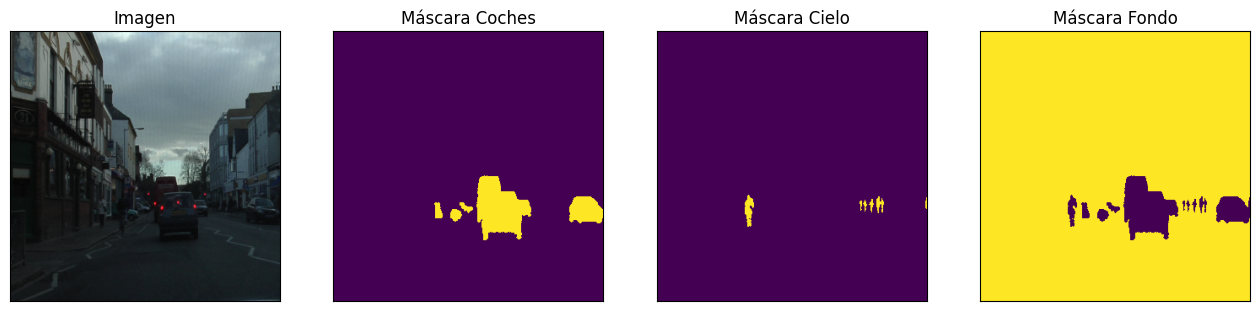

Casting image 'imagen' to uint8.
Scaling normalized image 'máscara_coches' back to 0-255.
Scaling normalized image 'máscara_cielo' back to 0-255.
Scaling normalized image 'máscara_fondo' back to 0-255.


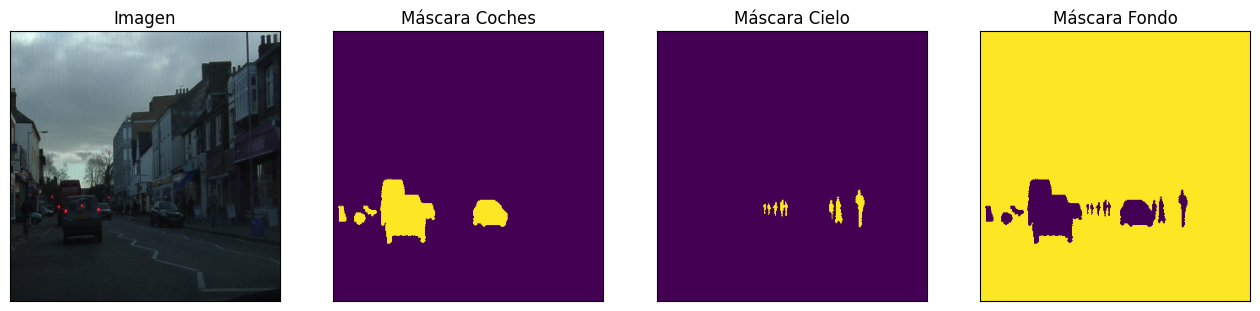

Casting image 'imagen' to uint8.
Scaling normalized image 'máscara_coches' back to 0-255.
Scaling normalized image 'máscara_cielo' back to 0-255.
Scaling normalized image 'máscara_fondo' back to 0-255.


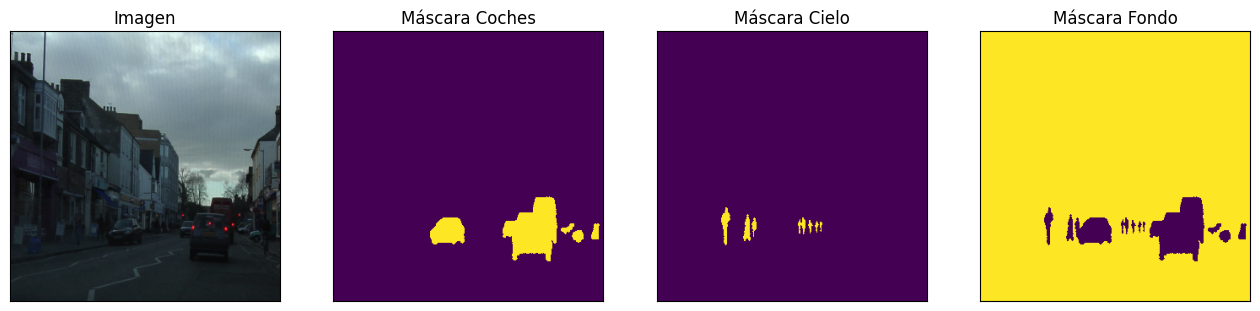

Casting image 'imagen' to uint8.
Scaling normalized image 'máscara_coches' back to 0-255.
Scaling normalized image 'máscara_cielo' back to 0-255.
Scaling normalized image 'máscara_fondo' back to 0-255.


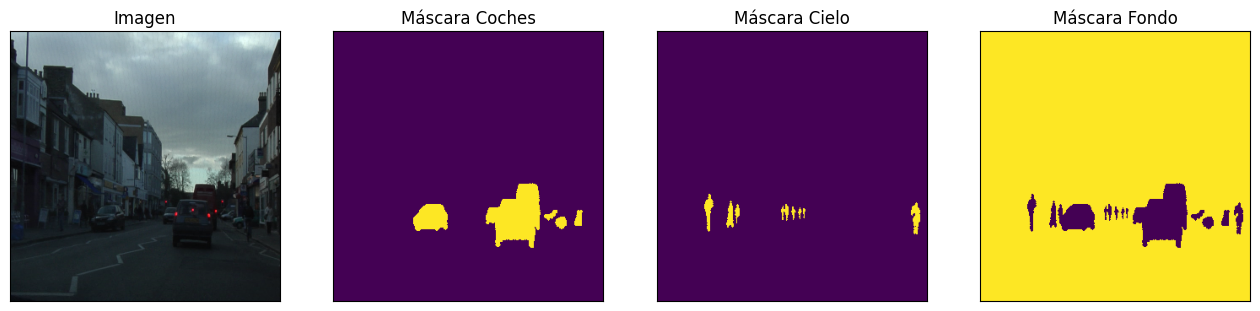

In [9]:
# Check augmentation effects
dataset = Dataset(x_train_dir, y_train_dir, classes=['coche', 'peatón'], augmentation=get_simple_training_augmentation())


for i in range(4):
    image, mask = dataset[8] # obtener una muestra
    visualize(
        imagen=image,
        máscara_coches=mask[..., 0].squeeze(),
        máscara_cielo=mask[..., 1].squeeze(),
        máscara_fondo=mask[..., 2].squeeze(),
    )

## 2. Segmentation model training

In [10]:
#!pip install albumentations>=0.3.0
#!pip install segmentation-models==1.0.1
#!pip install efficientnet==1.1.1

os.environ['SM_FRAMEWORK'] = 'tf.keras'
import segmentation_models as sm
print(sm.framework())

import tensorflow as tf 

Segmentation Models: using `tf.keras` framework.
tf.keras


In [11]:
# base pre-trained architectures for feature extraction
architectures = ['efficientnetb3', 'efficientnetb0', 'efficientnetb1' ,
                 'vgg16', 'vgg19', 'mobilenet', 'mobilenetv2',  
                 'inceptionv3', 'xception', 'resnet34'] 

BACKBONE = architectures[1]
BATCH_SIZE = 4
CLASSES = ['cielo', 'edificio', 'poste', 'carretera', 'acera',
               'árbol', 'señal', 'valla', 'coche',
               'peatón', 'ciclista', 'sin_etiquetar']

EPOCHS = 60

preprocess_input = sm.get_preprocessing(BACKBONE)

# definir parámetros de la red
n_classes = 1 if len(CLASSES) == 1 else (len(CLASSES) + 1)  # caso para segmentación binaria y multiclase
activation = 'sigmoid' if n_classes == 1 else 'softmax'
print(activation)

# crear modelo
model = sm.Unet(BACKBONE, classes=n_classes, activation=activation)

softmax
16804768/16804768 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
# COMPILAR Y ENTRENAR
import math
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.optimizers import AdamW, Adam
from camdriving import dice_loss, ClassMetricsCallback

# Perdidas
focal_loss = sm.losses.CategoricalFocalLoss()

def total_loss(y_true, y_pred):
    return dice_loss(y_true, y_pred) + focal_loss(y_true, y_pred)

# Métricas
metrics = [
    sm.metrics.IOUScore(threshold=0.5),
    sm.metrics.FScore(threshold=0.5)]

# Compilar el modelo
use_AsamW = False

if use_AsamW:
    # ALT1
    LR = 1e-3  # Learning rate inicial
    WD = 1e-5  # Weight decay
    optimizer = AdamW(learning_rate=LR, weight_decay=WD)
else:
    # ALT 2
    LR = 1e-3
    optimizer = Adam(learning_rate=LR)

model.compile(optimizer=optimizer, loss=total_loss, metrics=metrics)

train_dataset = Dataset(
    x_train_dir,
    y_train_dir,
    classes=CLASSES,
    augmentation=get_intense_training_augmentation(), #aumentacion menos agresiva: get_simple_training_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

valid_dataset = Dataset(
    x_valid_dir,
    y_valid_dir,
    classes=CLASSES,
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

print(f"Total samples in train_dataset: {len(train_dataset)}")
print(f"Total samples in valid_dataset: {len(valid_dataset)}")

train_dataloader = Dataloader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = Dataloader(valid_dataset, batch_size=1, shuffle=False)

# Definir las clases y datos de validación para ClassMetricsCallback
class_names = Dataset.CLASSES
val_images, val_masks = valid_dataloader[0]  # Primer lote

# Callbacks personalizados
class_metrics_callback = ClassMetricsCallback((val_images, val_masks), class_names)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('./best_model.weights.h5', save_weights_only=True, save_best_only=True, mode='min'),
    TensorBoard(log_dir='./logs'),
    class_metrics_callback,  # Métricas por clase para confirmar desbalance
    ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6 # learning rate
        )
    ]

image, mask = train_dataloader[0]
print(f"Image shape: {image.shape}, Mask shape: {mask.shape}")
output = model(tf.convert_to_tensor(image))
print(f"Model output shape: {output.shape}")

steps_per_epoch = EPOCHS * math.ceil(len(train_dataset) / BATCH_SIZE)
validation_steps = math.ceil(len(valid_dataset) / BATCH_SIZE)

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")

Total samples in train_dataset: 367
Total samples in valid_dataset: 101
Image shape: (4, 320, 320, 3), Mask shape: (4, 320, 320, 13)


2024-12-18 10:38:29.592204: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
W0000 00:00:1734529109.629185   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529109.653929   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529109.654929   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529109.656706   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529109.657119   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529109.657581   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529109.679348   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529109.679922   10599 gpu_t

Model output shape: (4, 320, 320, 13)
Steps per epoch: 5520
Validation steps: 26


W0000 00:00:1734529110.647270   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529110.648258   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529110.649429   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529110.650630   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529110.651848   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529110.652749   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529110.654068   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529110.655495   10599 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1734529110.656549   10599 gp

In [13]:
# Obtén un batch
image_batch, mask_batch = train_dataloader[0]

# Verifica tipos y formas
print(f"Image batch type: {type(image_batch)}, dtype: {image_batch.dtype}, shape: {image_batch.shape}")
print(f"Mask batch type: {type(mask_batch)}, dtype: {mask_batch.dtype}, shape: {mask_batch.shape}")


Image batch type: <class 'tensorflow.python.framework.ops.EagerTensor'>, dtype: <dtype: 'float32'>, shape: (4, 320, 320, 3)
Mask batch type: <class 'tensorflow.python.framework.ops.EagerTensor'>, dtype: <dtype: 'float32'>, shape: (4, 320, 320, 13)


In [14]:
# Entrenamiento
history = model.fit(
    train_dataloader,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_data=valid_dataloader,
    validation_steps=validation_steps,
)

/home/federico/Projects/imgClassification/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60


I0000 00:00:1734529136.101961   10683 service.cc:146] XLA service 0x7f2f74003c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734529136.101989   10683 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2024-12-18 10:38:56.876365: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
E0000 00:00:1734529149.758591   10683 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1734529149.850048   10683 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2024-12-18 10:39:40.503992: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : R

   2/5520 ━━━━━━━━━━━━━━━━━━━━ 5:12 57ms/step - f1-score: 5.5702e-04 - iou_score: 2.7928e-04 - loss: 0.9889   

I0000 00:00:1734529180.773446   10683 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  16/5520 ━━━━━━━━━━━━━━━━━━━━ 24:25 266ms/step - f1-score: 0.0465 - iou_score: 0.0411 - loss: 0.9369Repitiendo la ultima muestra para completar el lote
  92/5520 ━━━━━━━━━━━━━━━━━━━━ 26:09 289ms/step - f1-score: 0.1797 - iou_score: 0.1585 - loss: 0.7006

/home/federico/Projects/imgClassification/venv/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step

--- Métricas por clase: Epoch 1 ---
Clase: cielo - IOU: 0.7015
Clase: edificio - IOU: 0.5203
Clase: poste - IOU: 0.0000
Clase: carretera - IOU: 0.8337
Clase: acera - IOU: 0.0074
Clase: árbol - IOU: 0.4392
Clase: señal - IOU: 0.0000
Clase: valla - IOU: 0.0000
Clase: coche - IOU: 0.0000
Clase: peatón - IOU: 0.0194
Clase: ciclista - IOU: 0.0150
Clase: sin_etiquetar - IOU: 0.0000
5520/5520 ━━━━━━━━━━━━━━━━━━━━ 110s 9ms/step - f1-score: 0.2560 - iou_score: 0.2247 - loss: 0.5280 - val_f1-score: 0.3051 - val_iou_score: 0.2631 - val_loss: 0.4200 - learning_rate: 0.0010
Epoch 2/60
  20/5520 ━━━━━━━━━━━━━━━━━━━━ 27:22 299ms/step - f1-score: 0.2976 - iou_score: 0.2577 - loss: 0.3773Repitiendo la ultima muestra para completar el lote
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/stepp - f1-score: 0.3039 - iou_score: 0.2645 - loss: 0.375

--- Métricas por clase: Epoch 2 ---
Clase: cielo - IOU: 0.8316
Clase: edificio - IOU: 0.5418
Clase: poste - IOU: 0.0120
Clase: carretera -

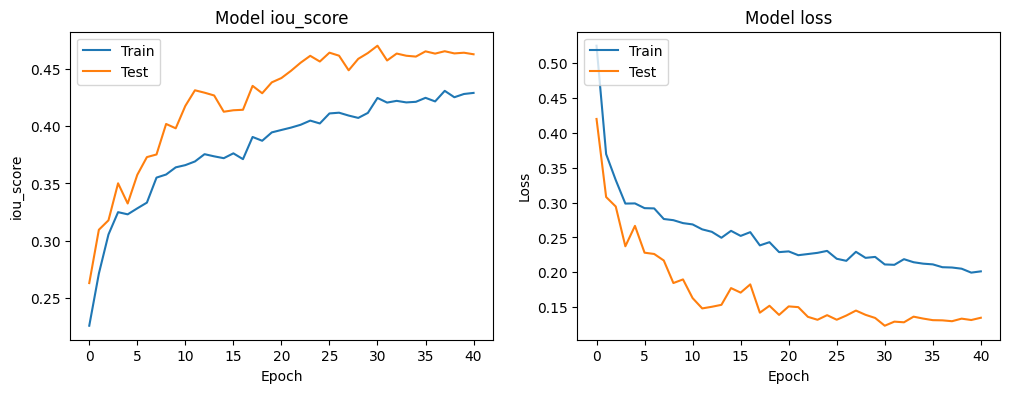

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation iou_score values
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 3. Segmentation model evaluation

In [16]:
test_dataset = Dataset(
    x_test_dir,
    y_test_dir,
    classes=CLASSES,
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

test_dataloader = Dataloader(test_dataset, batch_size=1, shuffle=False)

In [17]:
# Mejores pesos
model.load_weights('best_model.weights.h5')

In [18]:
scores = model.evaluate(test_dataloader)

print("Loss: {:.5}".format(scores[0]))
for metric, value in zip(metrics, scores[1:]):
    print("mean {}: {:.5}".format(metric.__name__, value))

233/233 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - f1-score: 0.5786 - iou_score: 0.5333 - loss: 0.1591
Loss: 0.16274
mean iou_score: 0.53576
mean f1-score: 0.58204


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Scaling normalized image 'image' back to 0-255.


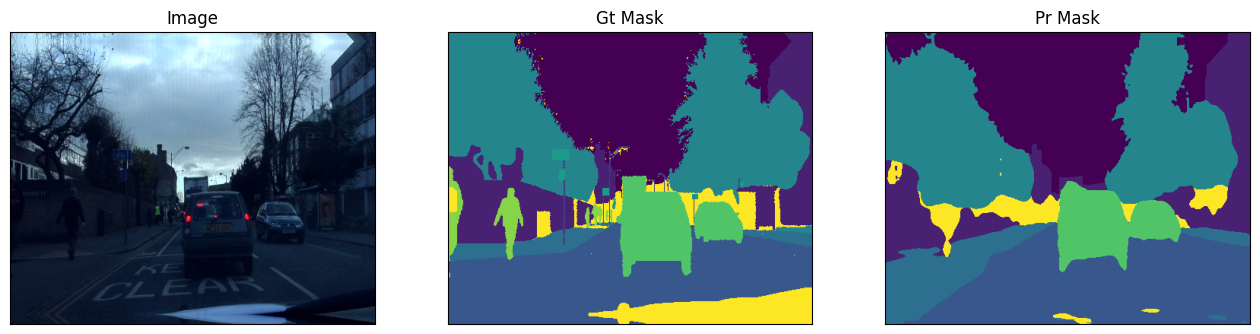

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Scaling normalized image 'image' back to 0-255.


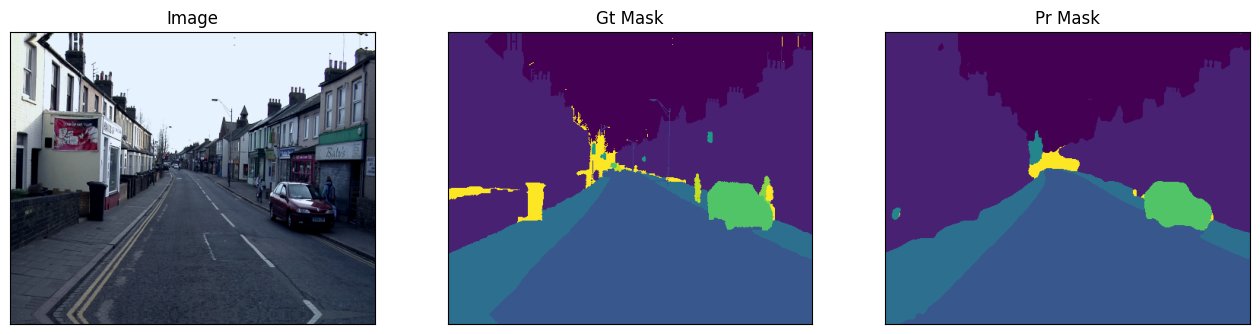

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Scaling normalized image 'image' back to 0-255.


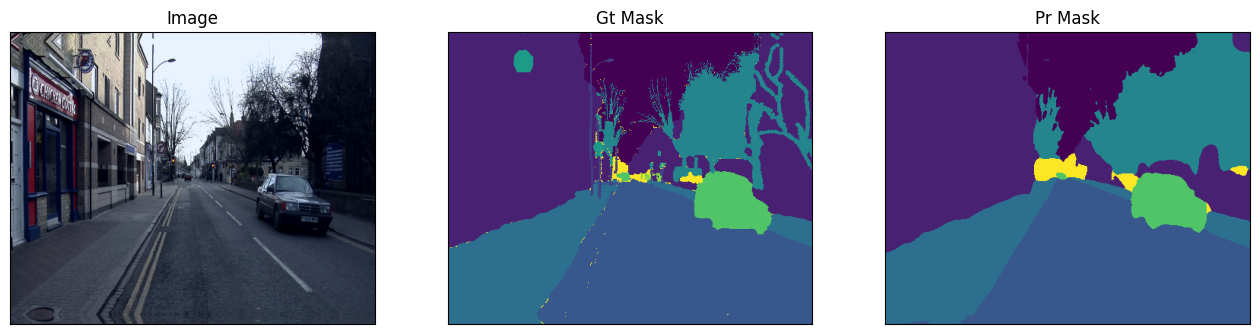

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Scaling normalized image 'image' back to 0-255.


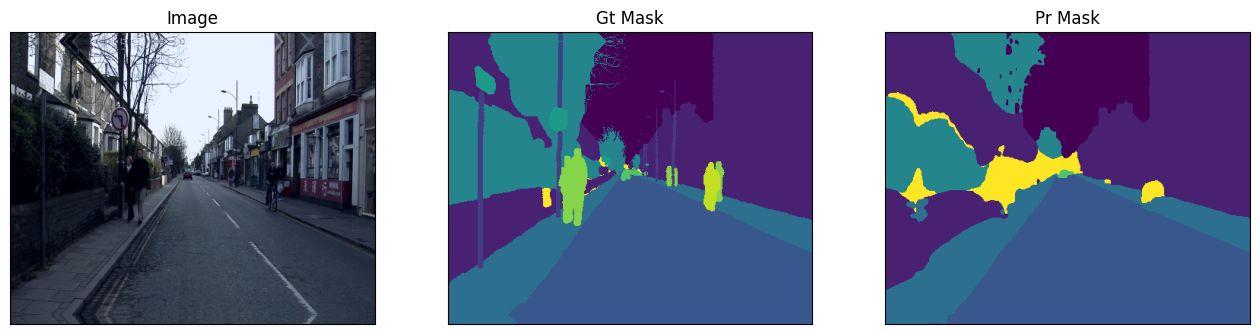

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Scaling normalized image 'image' back to 0-255.


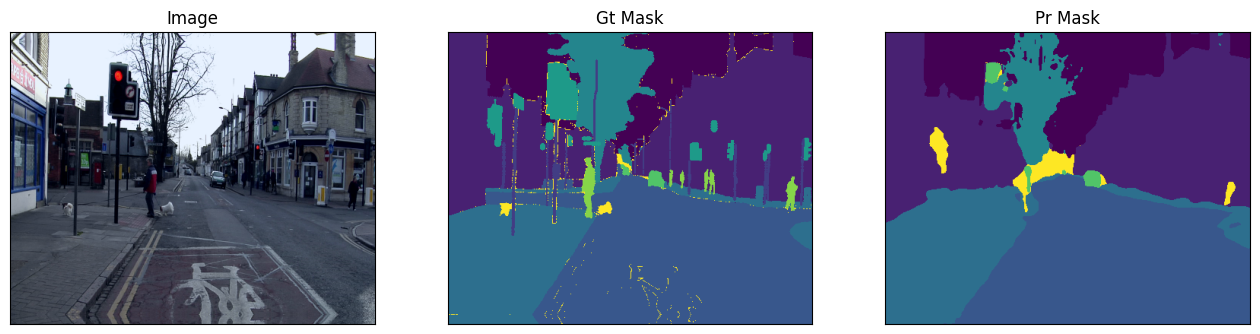

In [19]:
import numpy as np
from camdriving import denormalize

n = 5
ids = np.random.choice(np.arange(len(test_dataset)), size=n)

for i in ids:
    image, gt_mask = test_dataset[i]
    image = np.expand_dims(image, axis=0)
    pr_mask = model.predict(image)

    # Procesa las máscaras para visualización
    pr_mask = np.argmax(pr_mask.squeeze(), axis=-1)  # Selecciona la clase más probable para cada píxel
    gt_mask = np.argmax(gt_mask.squeeze(), axis=-1)  # Selecciona la clase más probable para cada píxel en la máscara real

    # Visualización
    visualize(
        image=denormalize(image.squeeze()),  # Imagen denormalizada
        gt_mask=gt_mask,                     # Máscara real procesada
        pr_mask=pr_mask,                     # Máscara predicha procesada
    )